# Frequencies Spectra for Individual Particles

In [1]:
import numpy as np
import math
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import signal

In [2]:
roi_size = 20.0
roi_center_x = 776.0
roi_center_y = 597.0
fps = 99.0
infname = r'\position_103V_20230822NoTiff'
outfname = r'\spe_V103_'

In [3]:
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230727spectra\04_an_frequenciesSpectra'
#folderPath = r'g:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230822spectra\04_an_frequenciesSpectra'
folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230903spectra\04_an_frequenciesSpectra'
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\110Vbias\20230822spectra\04_an_frequenciesSpectra'
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\120Vbias\20230824spectra\04_an_frequenciesSpectra'
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\140Vbias\20230827spectra\04_an_frequenciesSpectra'

In [4]:
#pos_filepath = folderPath + r'\inputs' + r'\position_noTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_103V_20230822NoTiff.txt'
pos_filepath = folderPath + r'\inputs' +  infname + r'.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_110V_20230823NoTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_V120_20230824NoTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_V140_20230827noTiff.txt'


In [5]:
col_names = [r'particle_notrack',r'frame',r'x',r'y']

In [6]:
df_pos = pd.read_csv(pos_filepath, header = None, names = col_names)

In [7]:
df_pos.head()

,particle_notrack,frame,x,y
0,1,0,780.188,379.837
1,2,0,896.715,381.002
2,3,0,872.771,382.088
3,4,0,848.078,387.114
4,5,0,636.090,393.319


In [8]:
#cacluate CM of particle cloud for each frame:

In [9]:
df_cm = df_pos.groupby('frame')[['x','y']].mean().reset_index()
df_cm.columns = ['frame', 'x_CM', 'y_CM']

In [10]:
df_pos = df_pos.merge(df_cm, on = 'frame', how = 'left')
df_pos.head()

,particle_notrack,frame,x,y,x_CM,y_CM
0,1,0,780.188,379.837,811.211406,609.49428
1,2,0,896.715,381.002,811.211406,609.49428
2,3,0,872.771,382.088,811.211406,609.49428
3,4,0,848.078,387.114,811.211406,609.49428
4,5,0,636.090,393.319,811.211406,609.49428


In [11]:
df_linked = tp.link(df_pos, 5.0, memory = 0)

Frame 971: 2285 trajectories present.


In [13]:
df_linked.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle
0,1,0,780.188,379.837,811.211406,609.49428,0
1532,1533,0,716.027,653.842,811.211406,609.49428,1
1533,1534,0,736.667,654.525,811.211406,609.49428,2
1534,1535,0,842.259,654.173,811.211406,609.49428,3
1535,1536,0,926.459,653.215,811.211406,609.49428,4


In [14]:
df_oneframe_check = df_pos[df_pos['frame'] == 333]

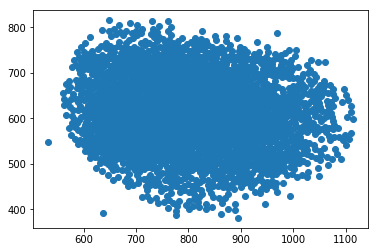

In [15]:
fig, ax = plt.subplots()
ax.scatter(df_oneframe_check['x'], df_oneframe_check['y'])

In [16]:
roi_condition = ((df_linked['x'] < roi_center_x + roi_size) &
                 (df_linked['y'] < roi_center_y + roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size))

In [17]:
df_roi = df_linked[roi_condition]

In [18]:
df_roi.size

1102381

In [19]:
df_linked.size

15712830

In [20]:
particles_listing = np.unique(df_roi['particle'])

In [21]:
type(particles_listing)

numpy.ndarray

In [22]:
particles_listing

array([   296,    307,    309, ..., 158059, 158061, 158065], dtype=int64)

In [23]:
len(particles_listing)

5650

In [24]:
traj_test = df_roi[df_roi['particle'] == 113]

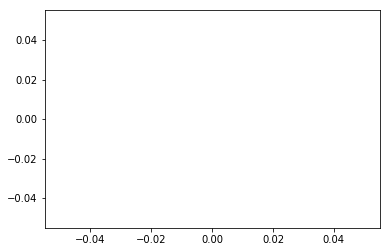

In [25]:
fig, ax = plt.subplots()
ax.plot(traj_test['x'], traj_test['y'])


In [26]:
arr_traj_lengths = np.empty(len(particles_listing))

In [27]:
for i in range(0, len(particles_listing)):
    cur_len = len(df_roi[df_roi['particle'] == particles_listing[i]])
    arr_traj_lengths[i] = cur_len
               

In [28]:
m_t_len = np.max(arr_traj_lengths)
m_t_len

972.0

In [29]:
pd_traj_len = pd.DataFrame({'particle':particles_listing, 'tr_len':arr_traj_lengths})

In [30]:
pd_traj_len.head()

,particle,tr_len
0,296,194.0
1,307,9.0
2,309,43.0
3,333,89.0
4,334,377.0


In [31]:
pd_traj_len.sort_values(by = 'tr_len', ascending = False, inplace = True)

In [32]:
pd_traj_len.head(20)

,particle,tr_len
69,1799,972.0
42,1739,972.0
109,1900,972.0
145,1980,972.0
146,1981,972.0
89,1853,972.0
37,1730,972.0
38,1735,972.0
39,1736,972.0
40,1737,972.0


In [33]:
traj_test = df_roi[df_roi['particle'] == 1799].copy()
N = len(traj_test['x'])

In [34]:
traj_test['x_rfcm'] = traj_test['x'] - traj_test['x_CM'] 
traj_test['y_rfcm'] = traj_test['y'] - traj_test['y_CM'] 
traj_test.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle,x_rfcm,y_rfcm
1006,1007,0,705.061,594.407,811.211406,609.494280,1799,-106.150406,-15.087280
3307,3308,1,704.768,593.997,813.529491,609.338894,1799,-108.761491,-15.341894
5651,5652,2,705.131,593.965,814.613029,608.388342,1799,-109.482029,-14.423342
7971,7972,3,705.153,594.001,812.149656,609.497798,1799,-106.996656,-15.496798
10257,10258,4,705.159,594.019,813.784709,610.149651,1799,-108.625709,-16.130651


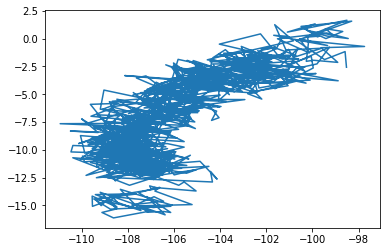

In [35]:

fig, ax = plt.subplots()
ax.plot(traj_test['x_rfcm'], traj_test['y_rfcm'])

In [79]:
times_test = np.arange(0,N,1) / fps
coord_test = np.array(traj_test['x_rfcm'])

In [80]:
n = len(coord_test)
step = 1
dt = 1.0 / fps
freq_connor = np.arange(-fps/2,fps/2,1/(step*dt*n))

In [81]:
freq, h = get_spectrum_connor_exact(times_test, (coord_test - np.mean(coord_test)))

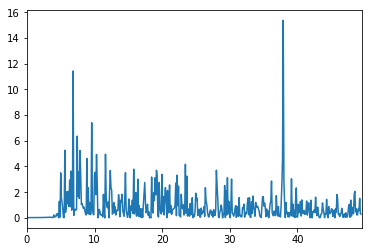

In [82]:
PSD = (h * np.conj(h)/n)
fig, ax = plt.subplots()
ax.set_xlim(0,fps/2)
ax.plot(freq,PSD)

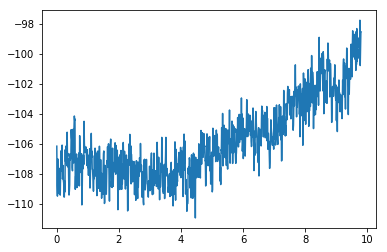

In [45]:
fig, ax = plt.subplots()
ax.plot(times_test, coord_test )

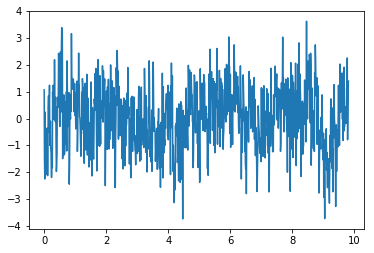

In [46]:
a, b, c = np.polyfit(times_test,np.array(traj_test['x_rfcm']), 2)
coord_test_diff = coord_test - c - b * times_test - a * times_test * times_test
fig, ax = plt.subplots()
ax.plot(times_test, coord_test_diff)

In [103]:
#Defining butterworth highpass filter
def butter_highpass(cutoff, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

#Function to apply highpass filter
def butter_highpass_filter(data, cutoff, fs, order=2):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [104]:
def get_spectrum_drift(arr_t, arr_sig):
    #slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    a, b, c = np.polyfit(arr_t, arr_sig, 2)
    #a, b, c, d = np.polyfit(arr_t, arr_sig, 3)
    arr_sig_nodrift = arr_sig - (a * arr_t * arr_t + b * arr_t + c)
    #arr_sig_nodrift = arr_sig - (a * arr_t * arr_t * arr_t + b * arr_t * arr_t + c * arr_t + d)
    arr_intens = np.fft.fft(arr_sig_nodrift)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    #print(N)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [105]:
def get_spectrum_PSD(arr_t, arr_sig):
    #slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    a, b, c = np.polyfit(arr_t, arr_sig, 2)
    #a, b, c, d = np.polyfit(arr_t, arr_sig, 3)
    arr_sig_nodrift = arr_sig - (a * arr_t * arr_t + b * arr_t + c)
    #arr_sig_nodrift = arr_sig - (a * arr_t * arr_t * arr_t + b * arr_t * arr_t + c * arr_t + d)
    dt = arr_t[1] - arr_t[0]
    fs = 1.0 / dt
    arr_freqs, arr_PSD = signal.welch(arr_sig, fs, nperseg = 500)
    return arr_freqs, arr_PSD

In [106]:
def get_spectrum(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    arr_intens = np.fft.fft(arr_sig_nomean)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [141]:
def get_spectrum_connor(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    dt = arr_t[1] - arr_t[0]
    fps = 1.0 / dt
    arr_filtered = butter_highpass_filter(arr_sig_nomean,5.0,fps)
    arr_intens = np.fft.fft(arr_filtered)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]
    return arr_freqs, arr_intens    

In [142]:
def get_spectrum_connor_exact(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    dt = arr_t[1] - arr_t[0]
    fps = 1.0 / dt
    arr_filtered = butter_highpass_filter(arr_sig_nomean,5.0,fps)
    arr_intens = np.fft.fft(arr_filtered)
    arr_intens = np.fft.fftshift(arr_intens)
    #arr_freqs = np.fft.fftfreq(N, dt)[:N//2]
    arr_freqs = np.arange(-fps/2,fps/2,1/(dt * len(arr_sig)))
    return arr_freqs, arr_intens    

In [143]:
def get_spectrum_drift_connor(arr_t, arr_sig):
    #slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    a, b, c = np.polyfit(arr_t, arr_sig, 2)
    #a, b, c, d = np.polyfit(arr_t, arr_sig, 3)
    arr_sig_nodrift = arr_sig - (a * arr_t * arr_t + b * arr_t + c)
    dt = arr_t[1] - arr_t[0]
    fps = 1.0 / dt
    arr_filtered = butter_highpass_filter(arr_sig_nodrift,5.0,fps)
    arr_intens = np.fft.fft(arr_filtered)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]
    return arr_freqs, arr_intens    

In [144]:
df_long_traj = pd_traj_len[pd_traj_len['tr_len'] == m_t_len]
arr_p = np.array(df_long_traj['particle'])
med_spectrum = np.zeros(math.floor(m_t_len / 2))


In [145]:
len(arr_p)

36

In [146]:
maxpn = min([36, len(arr_p)])

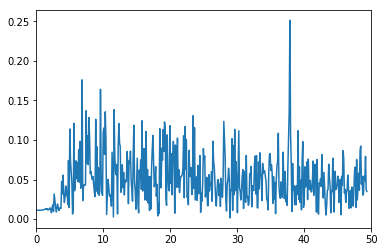

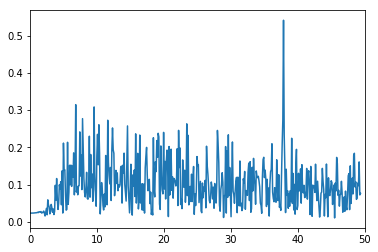

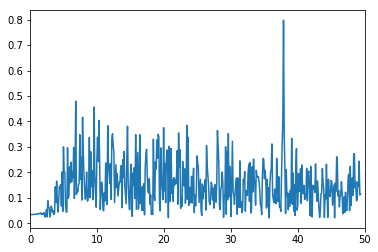

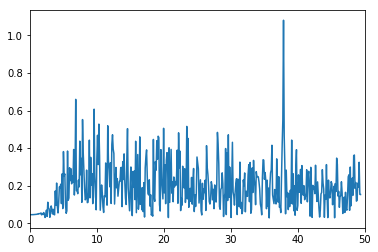

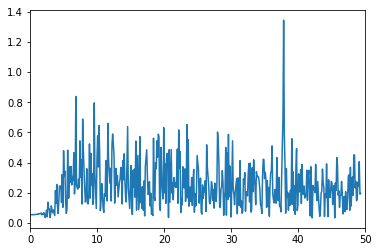

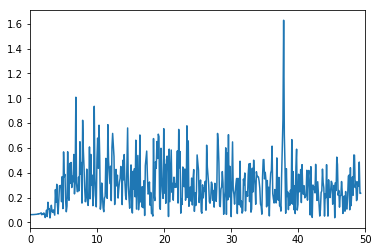

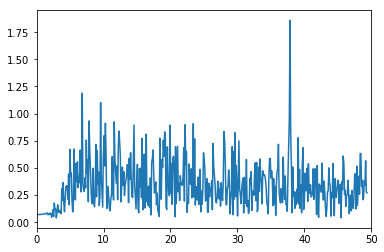

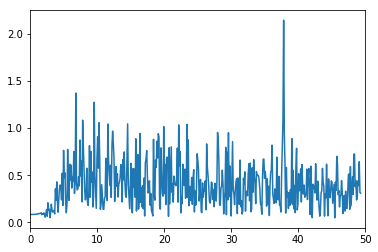

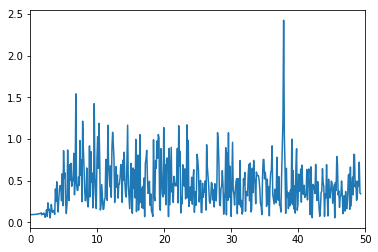

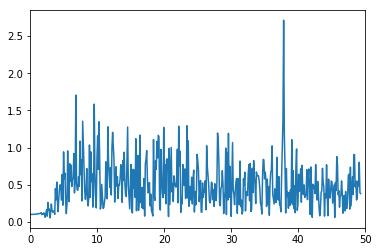

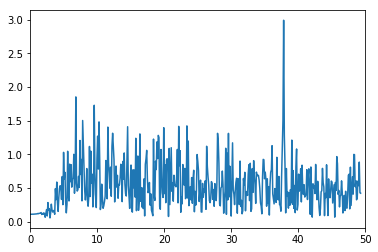

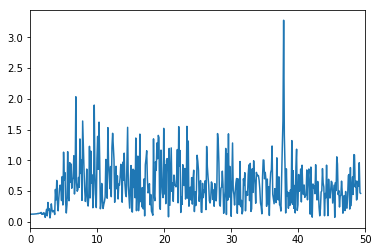

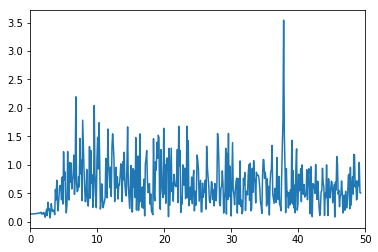

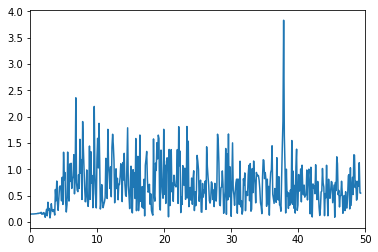

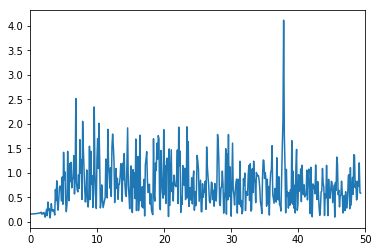

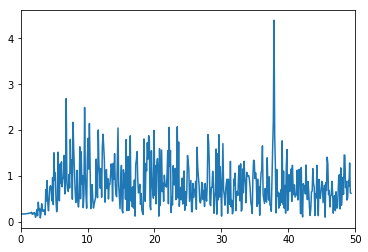

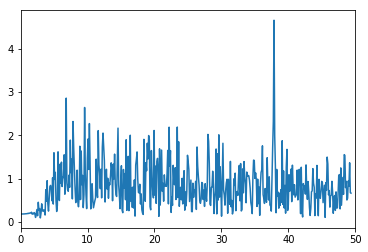

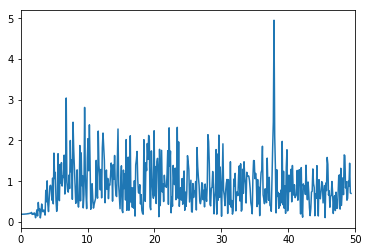

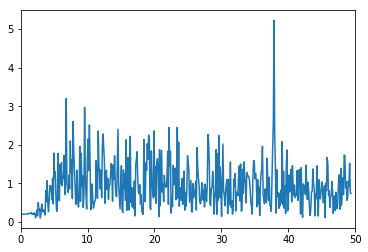

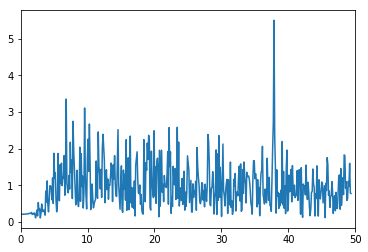

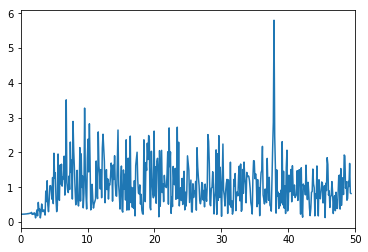

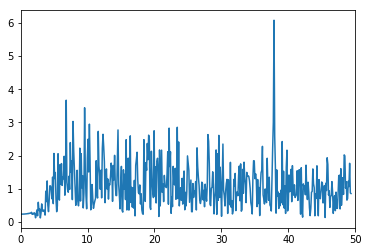

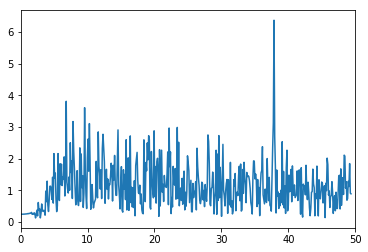

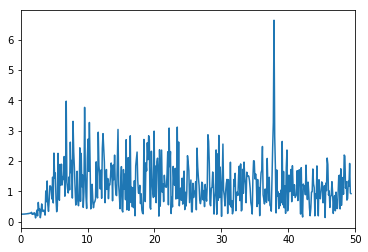

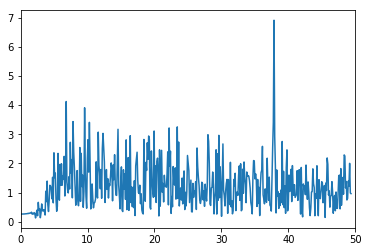

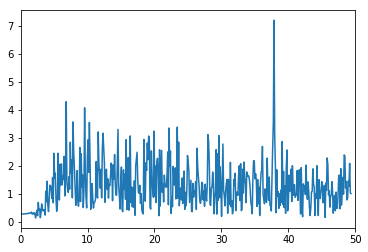

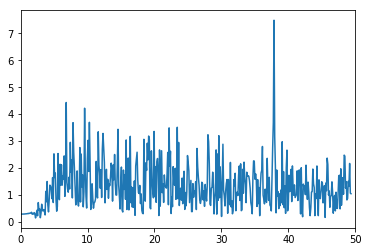

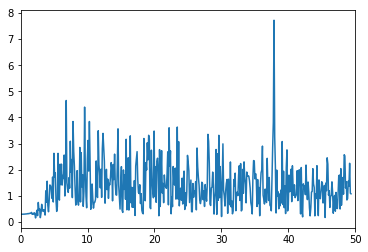

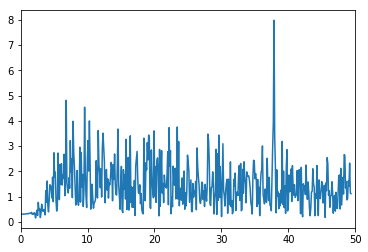

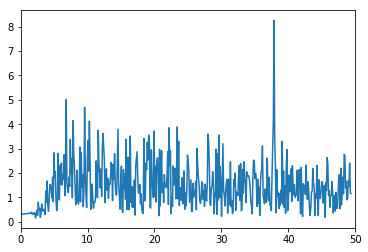

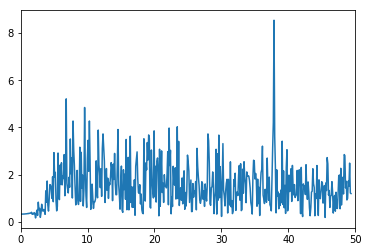

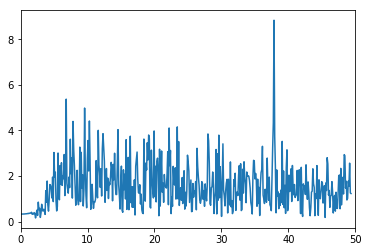

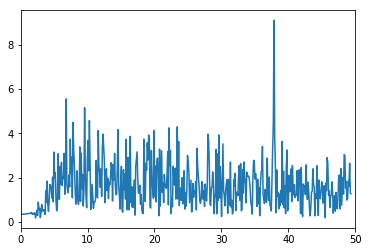

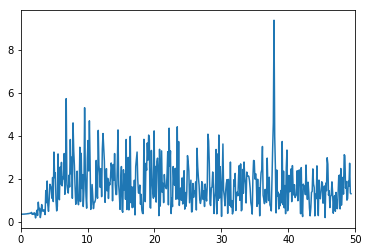

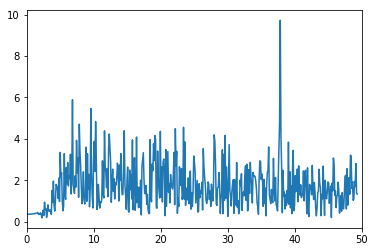

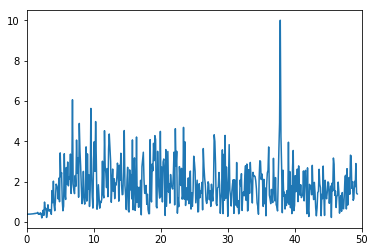

In [147]:
for i in range(0,maxpn):
    pname_i = arr_p[i]
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum_connor(arr_time_i, traj_i['x_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    med_spectrum += arr_abs_intens
    #arr_norm_intens = ((arr_abs_intens - np.min(arr_abs_intens)) / 
    #                  (np.max(arr_abs_intens) - np.min(arr_abs_intens)))
    #arr_savg = savgol_filter(arr_abs_intens, 3, 2)    
    #ax_i.plot(arr_freqs_i, arr_norm_intens)
    ax_i.plot(arr_freqs_i, med_spectrum)
    df_spectrum_i = pd.DataFrame({'freq':arr_freqs_i, 'norm_intens': arr_abs_intens})
    fname_i = folderPath + r'\outputs'  + outfname + r'x_graph_' + str(i) + r'_p' + str(pname_i)
    fname_csv_i = fname_i + r'.csv'
    fname_png_i = fname_i + r'.png'
    df_spectrum_i.to_csv(fname_csv_i, index = False)
    fig_i.savefig(fname_png_i)

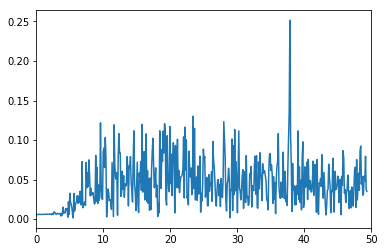

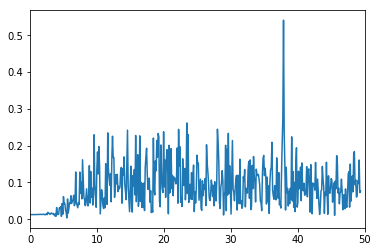

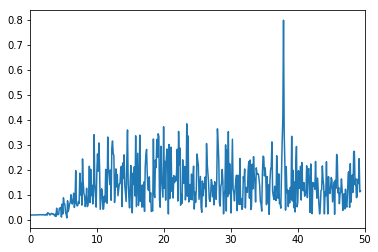

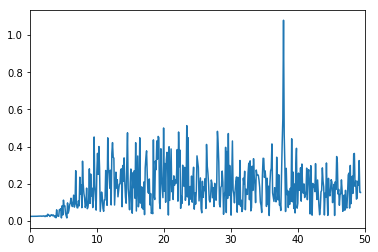

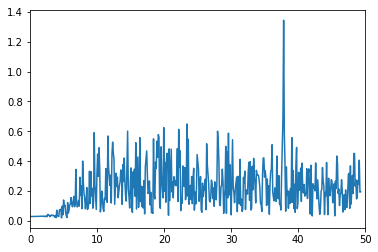

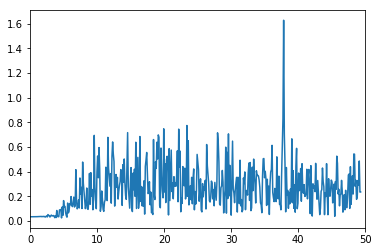

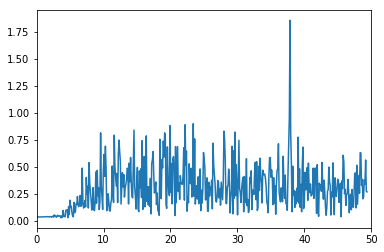

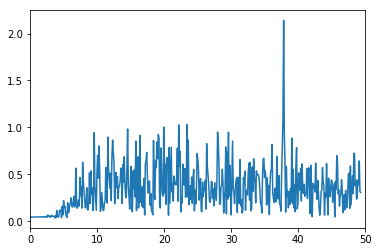

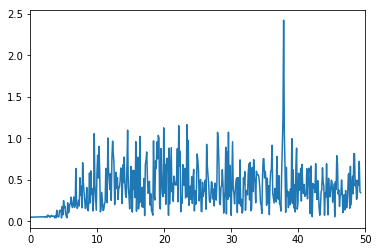

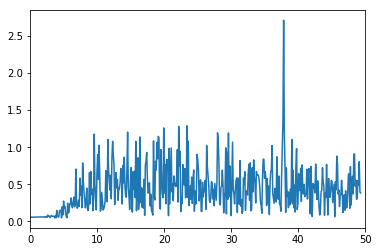

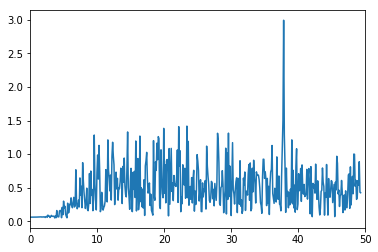

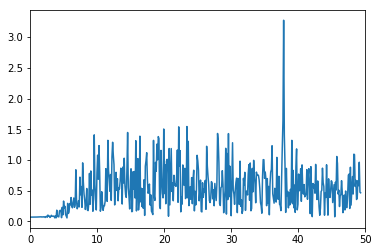

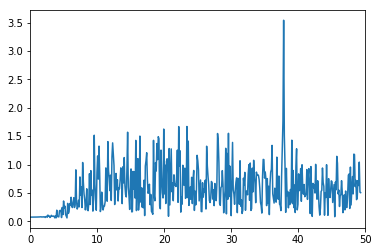

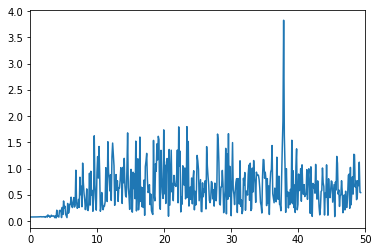

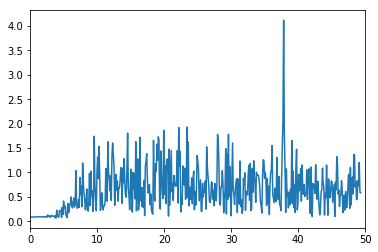

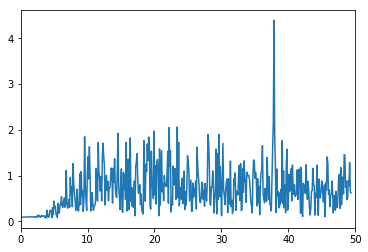

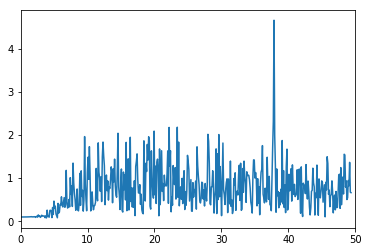

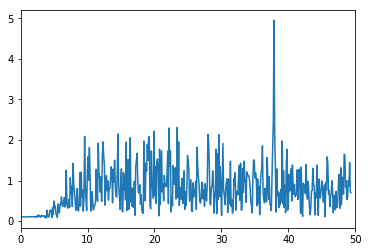

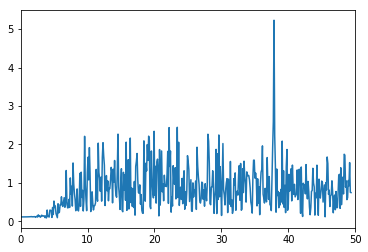

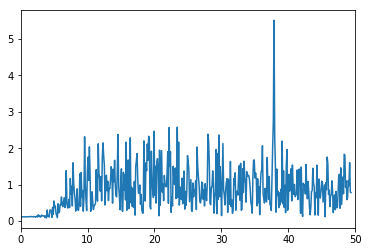

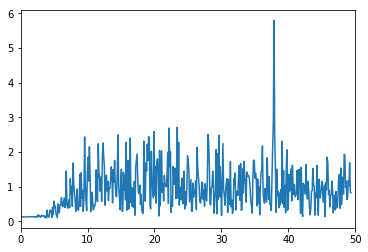

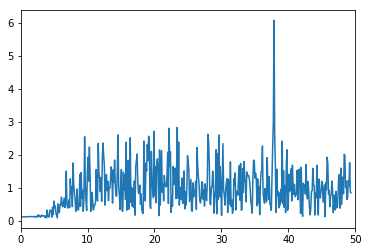

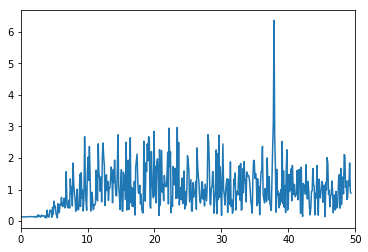

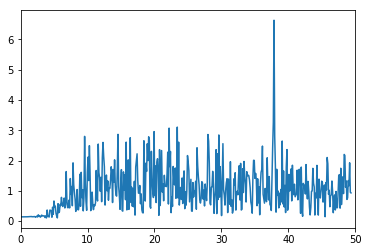

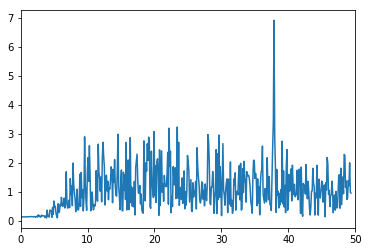

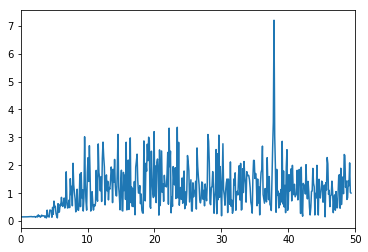

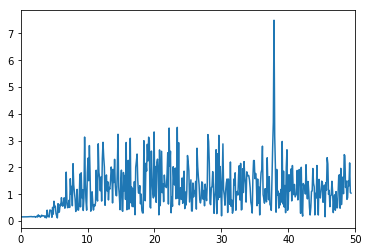

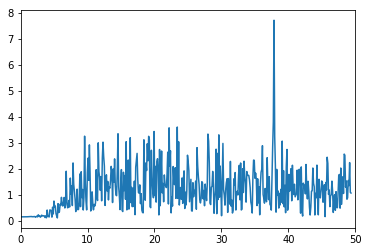

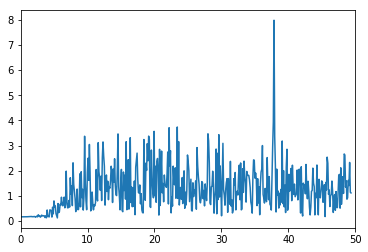

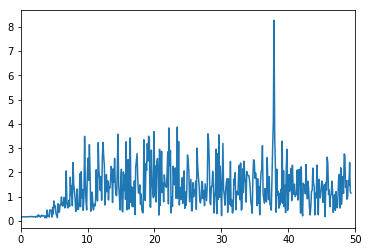

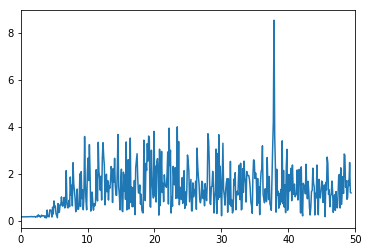

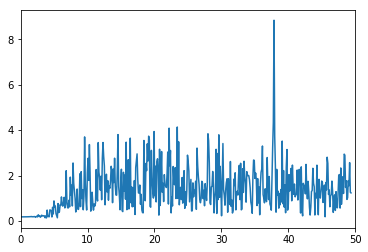

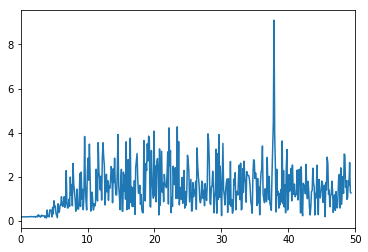

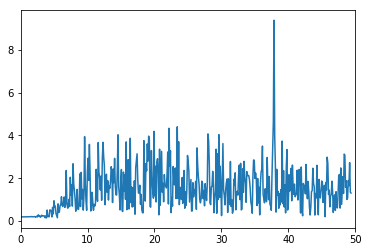

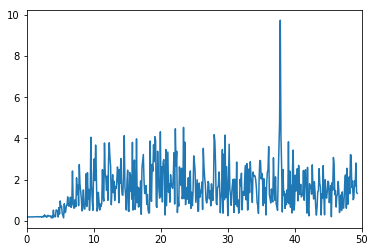

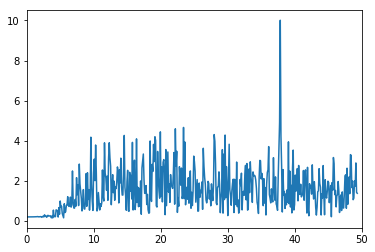

In [111]:
for i in range(0,len(arr_p)):
    pname_i = arr_p[i]
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum_drift_connor(arr_time_i, traj_i['x_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    med_spectrum += arr_abs_intens
    arr_norm_intens = ((arr_abs_intens - np.min(arr_abs_intens)) / 
                      (np.max(arr_abs_intens) - np.min(arr_abs_intens)))
    #arr_savg = savgol_filter(arr_abs_intens, 3, 2)    
    #ax_i.plot(arr_freqs_i, arr_norm_intens)
    ax_i.plot(arr_freqs_i, med_spectrum)
    df_spectrum_i = pd.DataFrame({'freq':arr_freqs_i, 'norm_intens': arr_norm_intens})
    fname_i = folderPath + r'\outputs'  + outfname + r'x_graph_' + str(i) + r'_p' + str(pname_i)
    fname_csv_i = fname_i + r'.csv'
    fname_png_i = fname_i + r'.png'
    df_spectrum_i.to_csv(fname_csv_i, index = False)
    fig_i.savefig(fname_png_i)
    
    

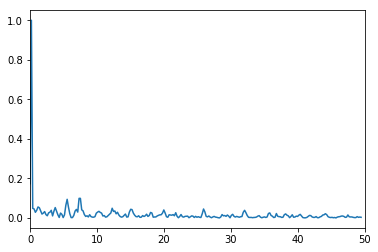

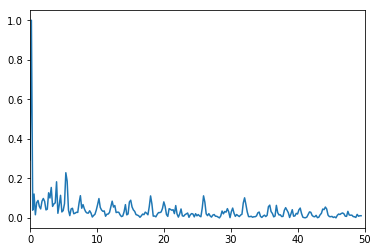

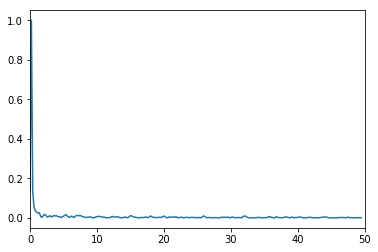

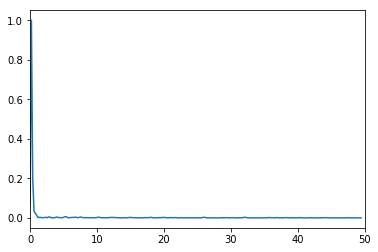

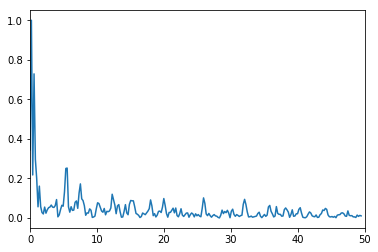

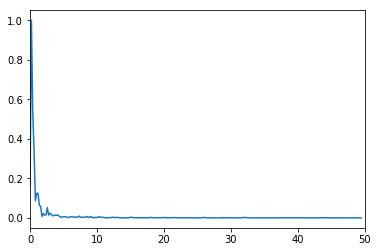

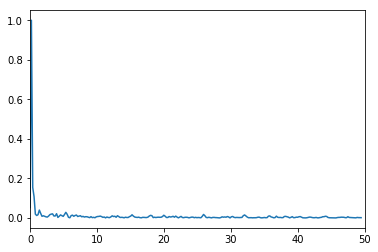

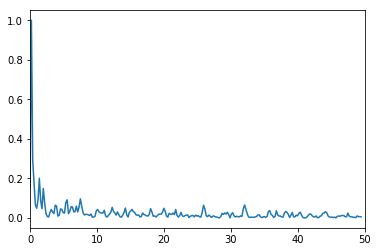

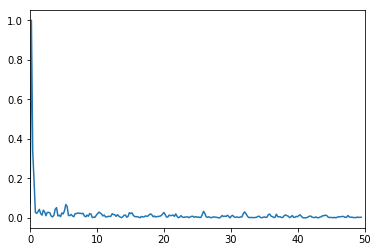

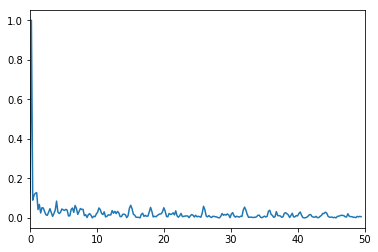

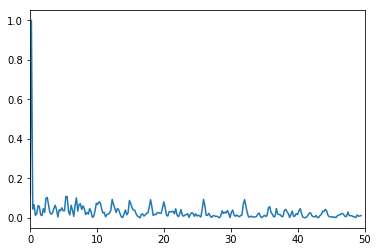

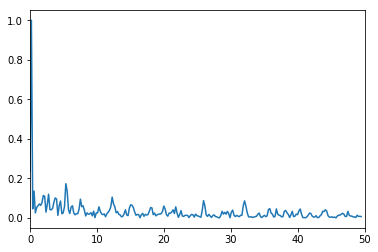

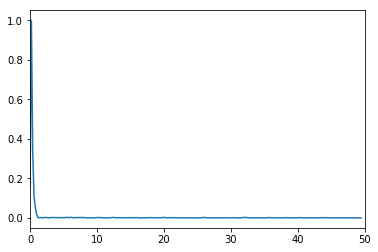

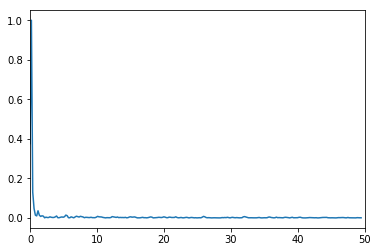

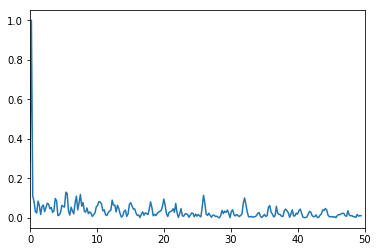

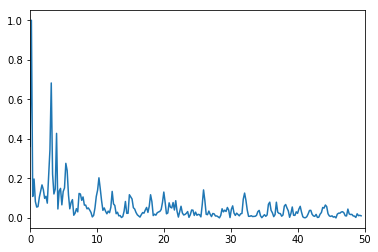

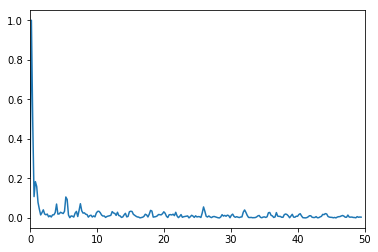

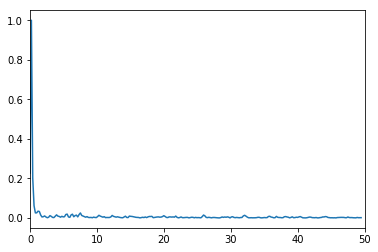

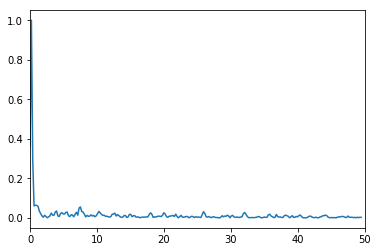

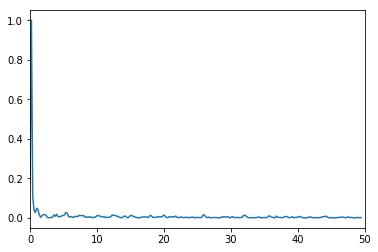

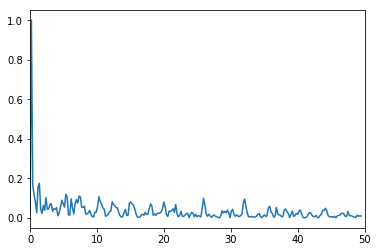

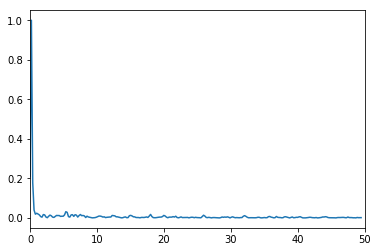

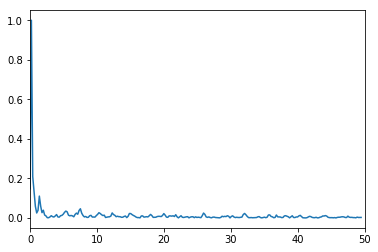

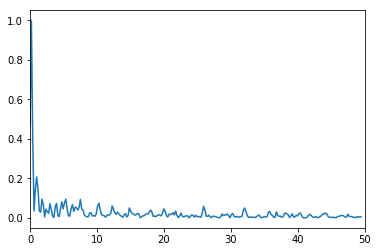

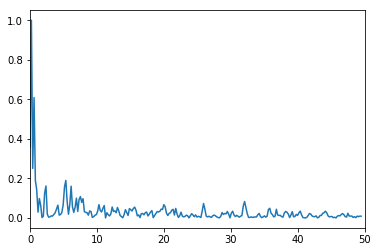

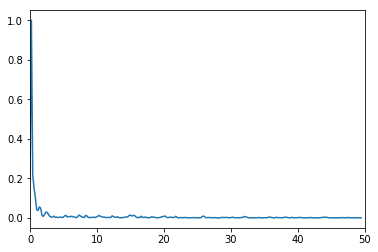

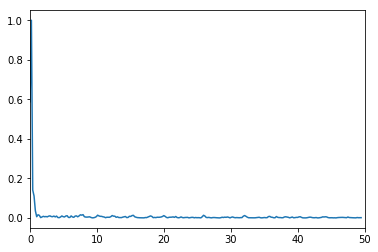

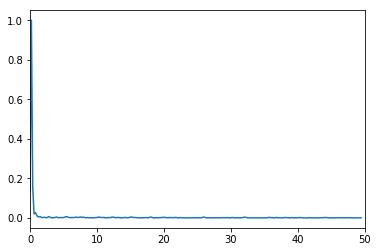

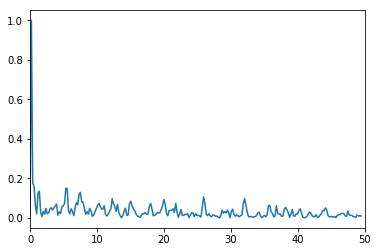

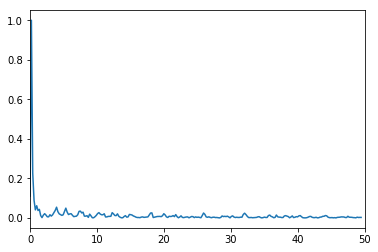

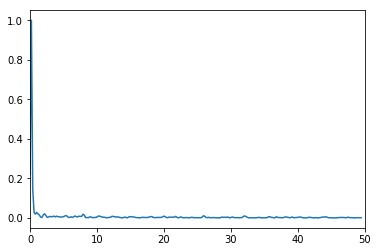

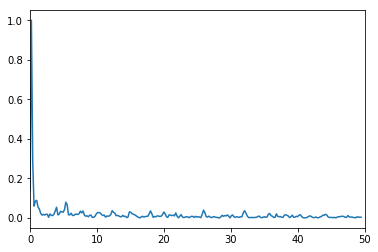

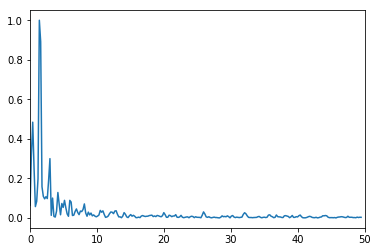

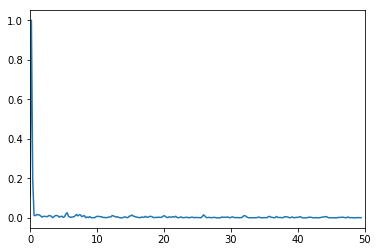

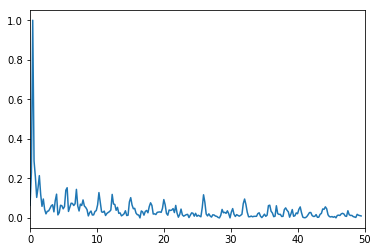

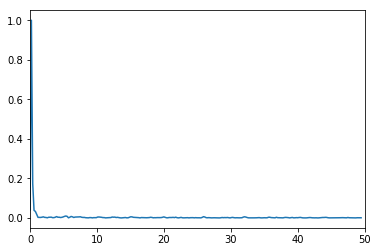

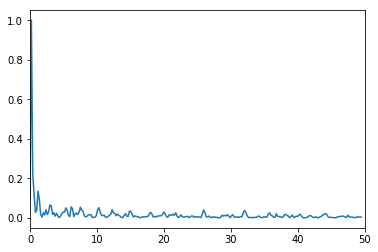

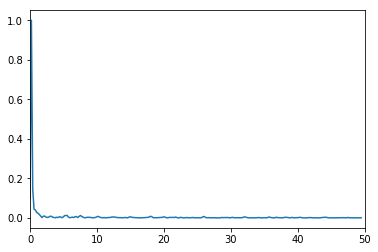

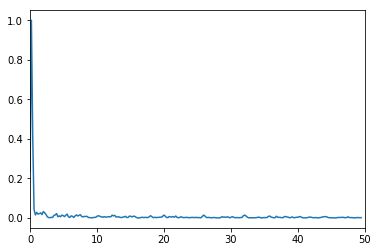

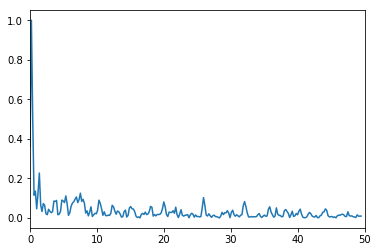

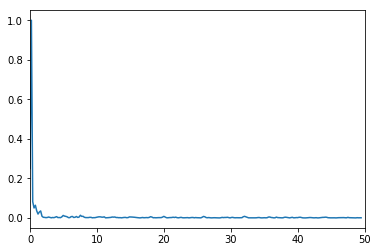

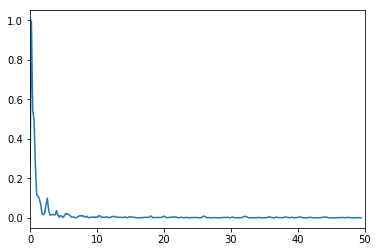

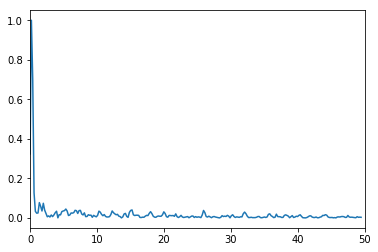

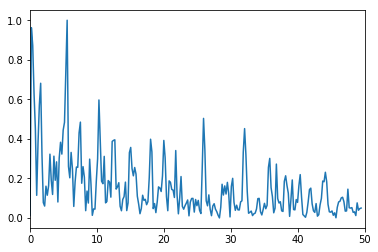

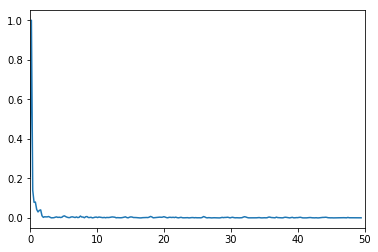

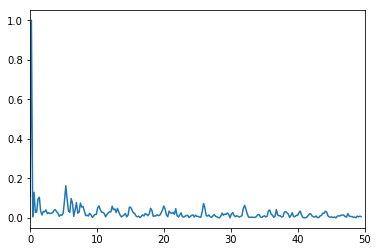

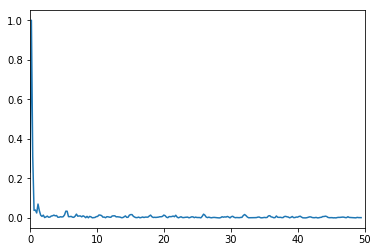

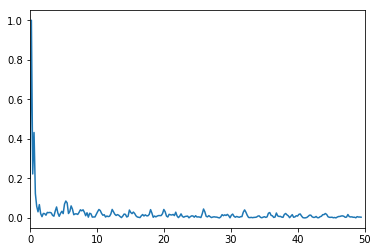

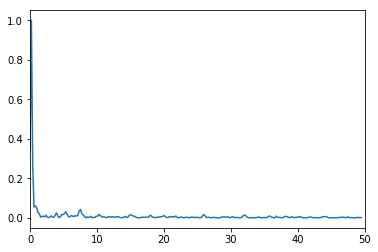

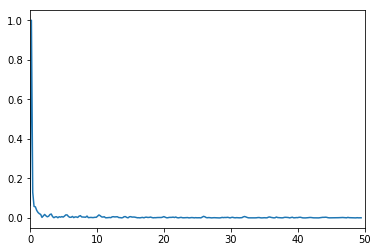

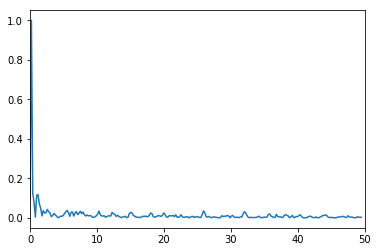

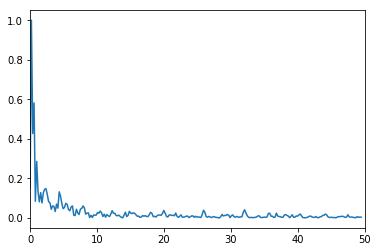

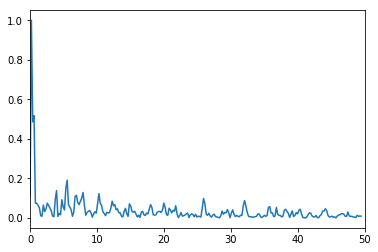

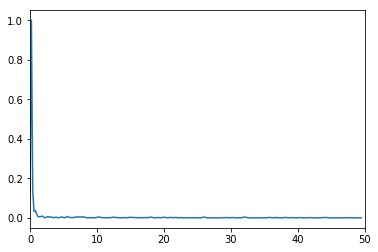

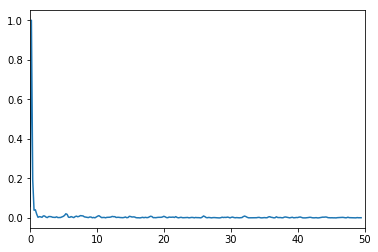

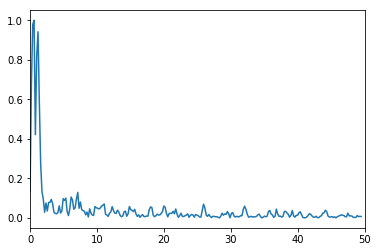

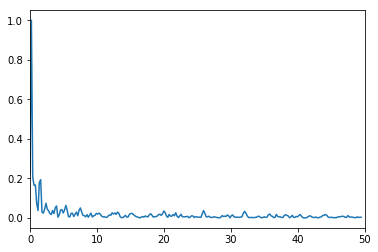

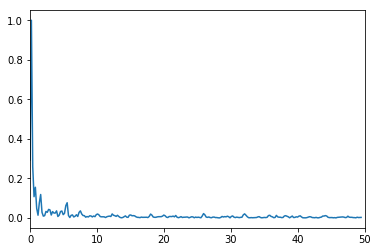

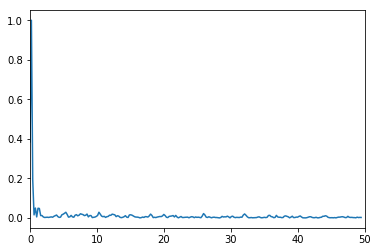

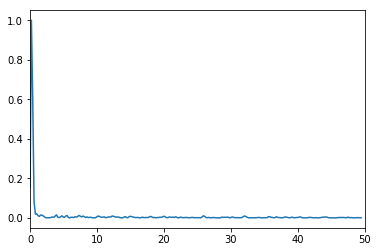

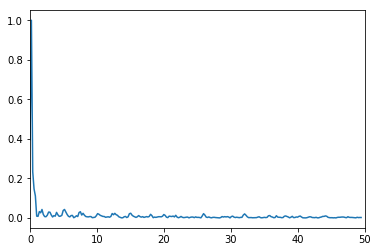

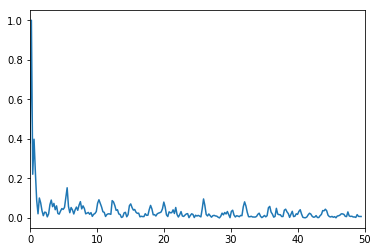

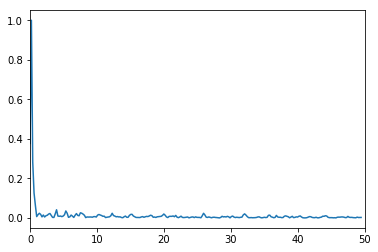

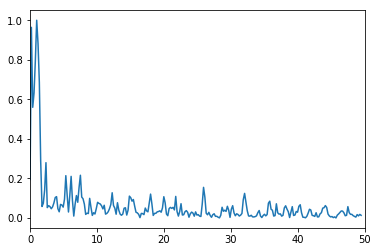

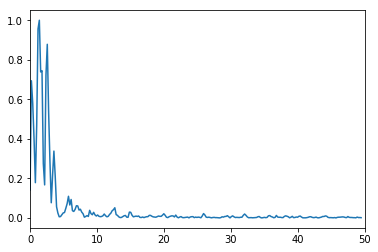

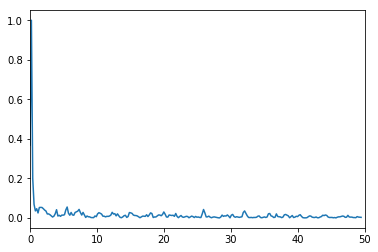

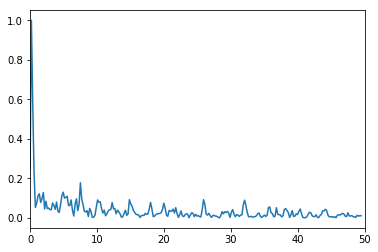

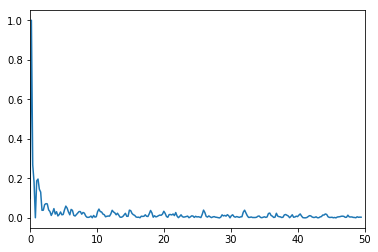

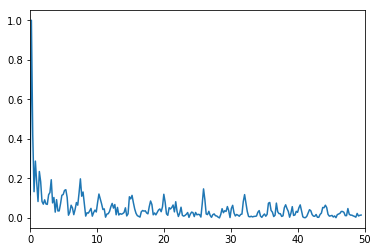

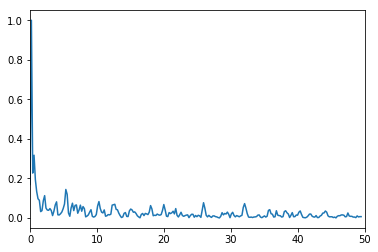

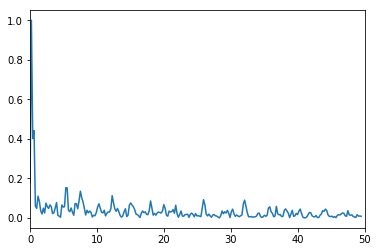

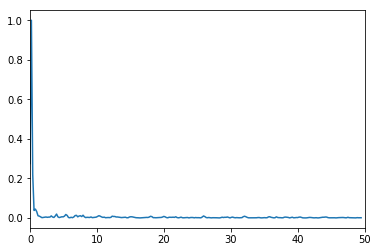

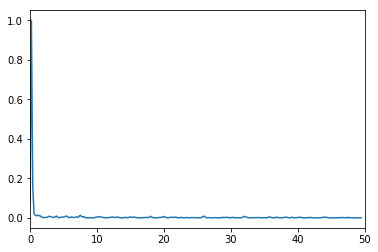

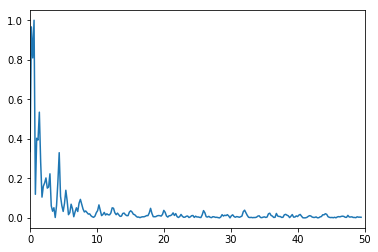

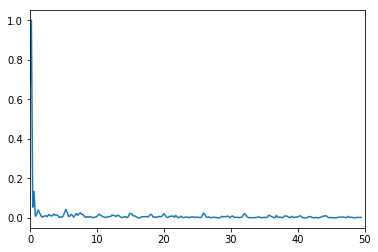

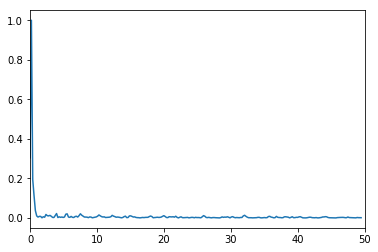

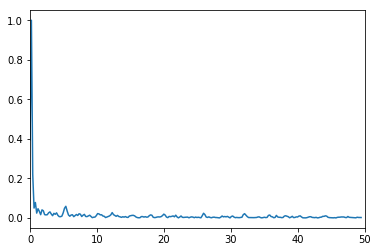

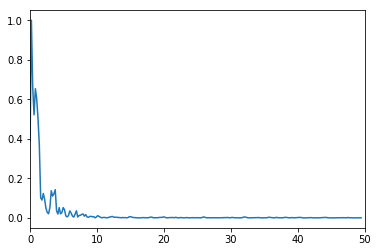

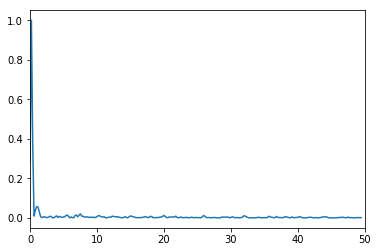

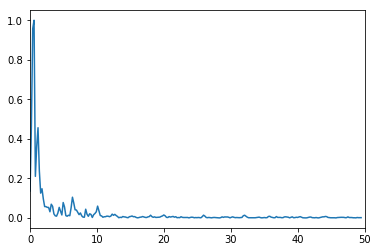

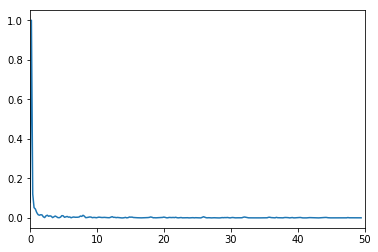

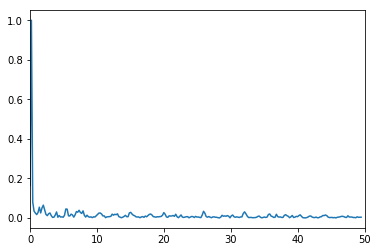

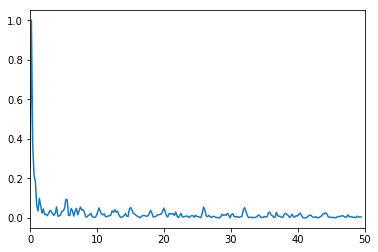

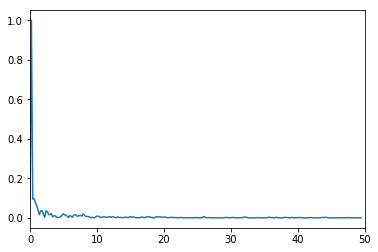

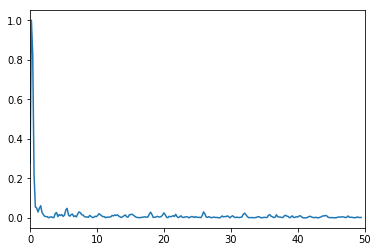

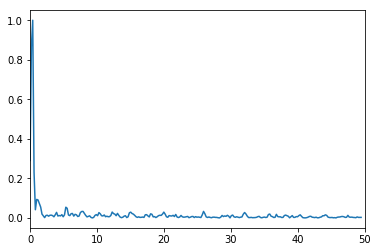

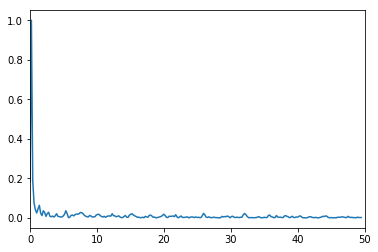

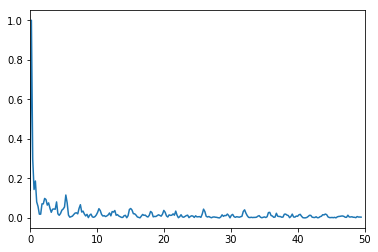

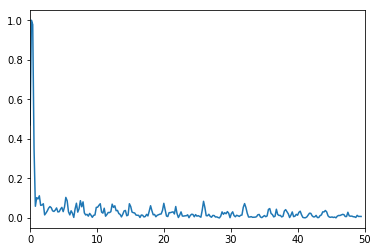

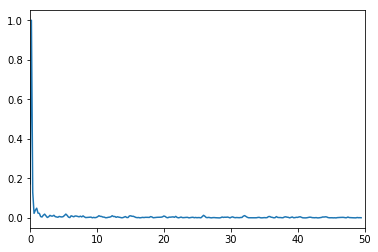

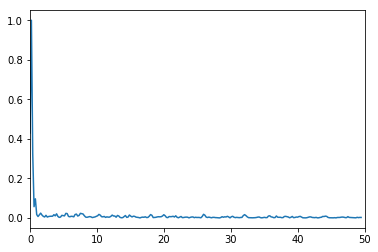

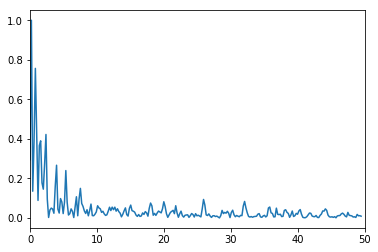

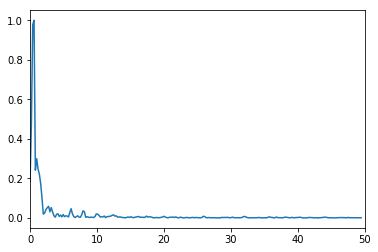

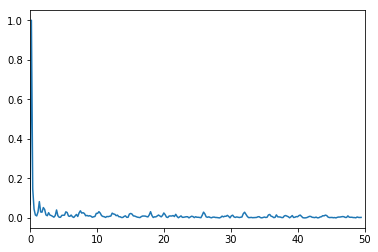

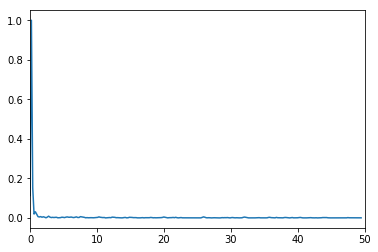

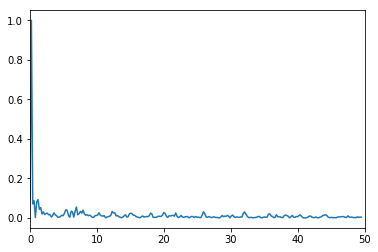

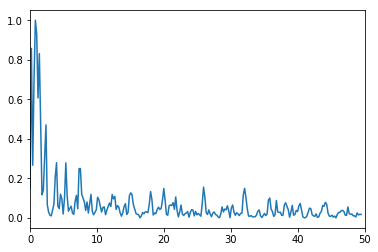

In [135]:
flag_first_time = 1
for i in range(0,len(arr_p)):
    pname_i = arr_p[i]
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum_PSD(arr_time_i, traj_i['x_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    #if (flag_first_time == 1):
        #flag_first_time = 0
    #else:
        #avg_spectrum += arr_intens_i
    arr_norm_intens = ((arr_intens_i - np.min(arr_intens_i)) / 
                      (np.max(arr_intens_i) - np.min(arr_intens_i)))
    #arr_savg = savgol_filter(arr_abs_intens, 3, 2)    
    #ax_i.plot(arr_freqs_i, arr_norm_intens)
    ax_i.plot(arr_freqs_i, arr_norm_intens)
    df_spectrum_i = pd.DataFrame({'freq':arr_freqs_i, 'norm_intens': arr_norm_intens})
    fname_i = folderPath + r'\outputs'  + outfname + r'x_PSD_' + str(i) + r'_p' + str(pname_i)
    fname_csv_i = fname_i + r'.csv'
    fname_png_i = fname_i + r'.png'
    df_spectrum_i.to_csv(fname_csv_i, index = False)
    fig_i.savefig(fname_png_i)
    
    

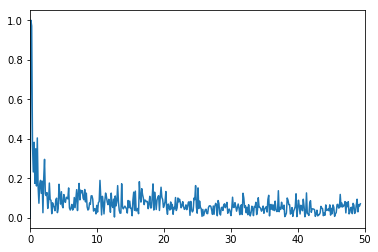

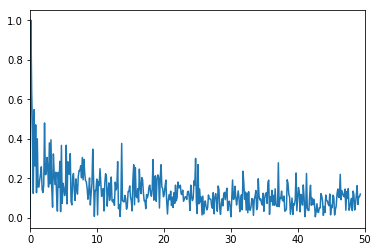

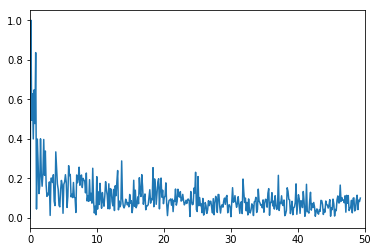

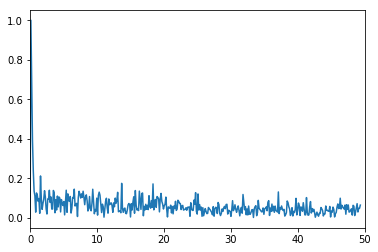

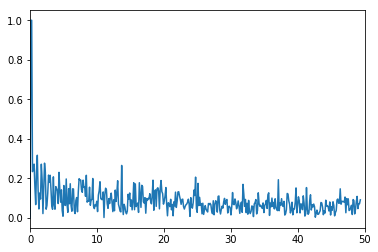

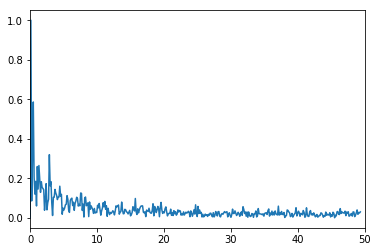

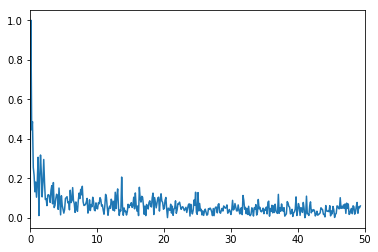

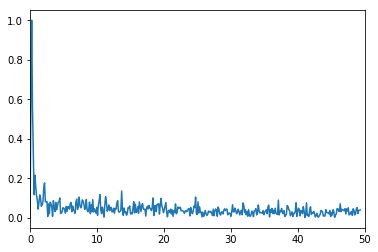

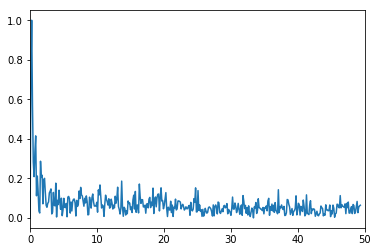

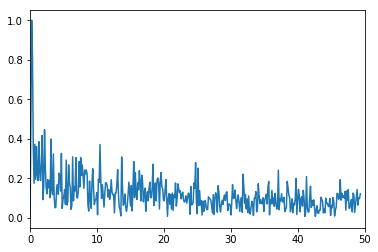

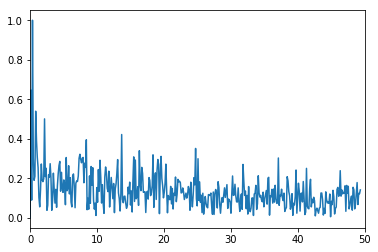

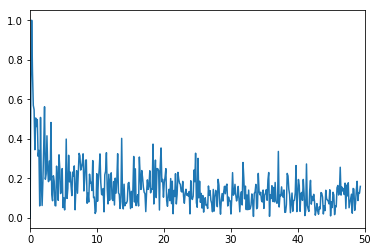

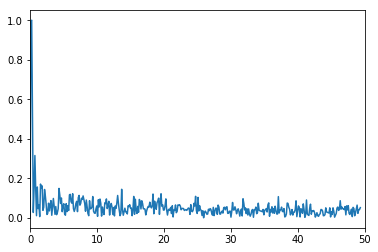

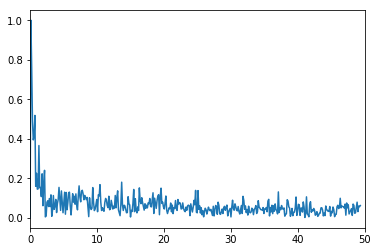

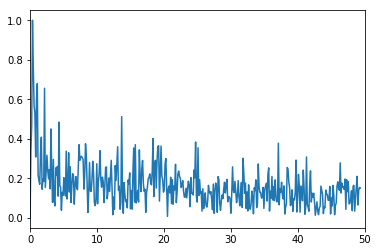

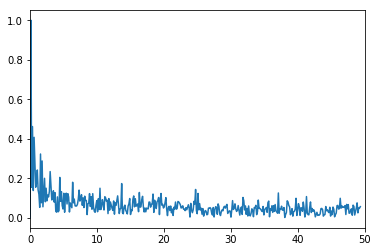

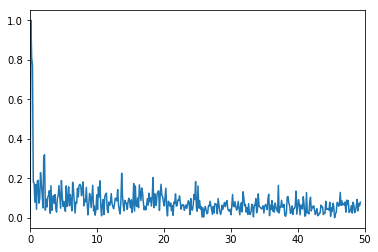

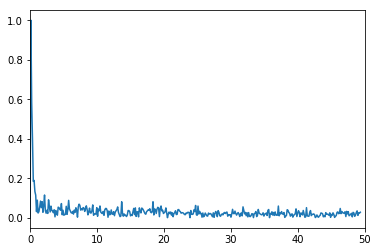

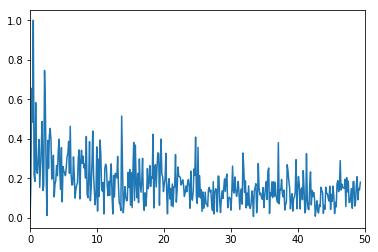

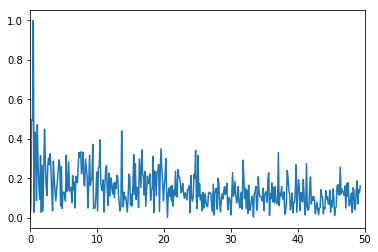

In [66]:
for i in range(0,20):
    pname_i = arr_p[i]
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum_drift(arr_time_i, traj_i['y_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    arr_norm_intens = ((arr_abs_intens - np.min(arr_abs_intens)) / 
                      (np.max(arr_abs_intens) - np.min(arr_abs_intens)))
    #arr_savg = savgol_filter(arr_abs_intens, 3, 2)    
    ax_i.plot(arr_freqs_i, arr_norm_intens)
    df_spectrum_i = pd.DataFrame({'freq':arr_freqs_i, 'norm_intens': arr_norm_intens})
    fname_i = folderPath + r'\outputs'  + outfname + r'y_graph_' + str(i) + r'_p' + str(pname_i)
    fname_csv_i = fname_i + r'.csv'
    fname_png_i = fname_i + r'.png'
    df_spectrum_i.to_csv(fname_csv_i, index = False)
    fig_i.savefig(fname_png_i)

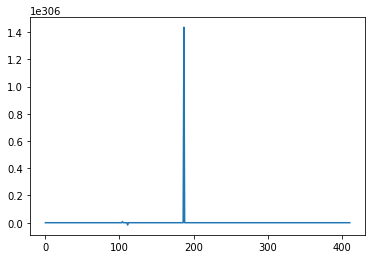

In [88]:
fig, ax = plt.subplots()
ax.plot(med_spectrum)